In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
nfl_teams=["ARI", "ATL", "BAL", "BUF", "CAR", "CHI", "CIN", "CLE", "DAL", "DEN", 
           "DET", "GB", "HOU", "IND", "JAX", "KC", "LV", "LAC", "LA", "MIA", 
           "MIN", "NE", "NO", "NYG", "NYJ", "PHI", "PIT", "SF", "SEA", "TB", 
           "TEN", "WAS"]

ep_sets = []
down = 1
distance = 10

unfinished = []

for team in nfl_teams:
    try:
        ep_set_df = pd.read_csv('team_data/team-data/'+team+'/norm_eps.csv')
        ep_set = ep_set_df[ep_set_df['Down'] == down]
        ep_set = ep_set[((ep_set['Distance'] == distance) & (ep_set['Yardline'] >= distance)) | ((ep_set['Yardline'] < distance) 
                                                                                                    & (ep_set['Distance'] == ep_set['Yardline']))]
        ep_sets.append((team, ep_set))
    except:
        unfinished.append(team)
        pass

nfl = pd.read_csv('team_data/nfl_eps/norm_eps.csv')
ep_set_nfl = nfl[nfl['Down'] == down]
ep_set_nfl = ep_set_nfl[((ep_set_nfl['Distance'] == distance) & (ep_set_nfl['Yardline'] >= distance)) | ((ep_set_nfl['Yardline'] < distance) 
                                                                                                   & (ep_set_nfl['Distance'] == ep_set_nfl['Yardline']))]
#ep_sets.append(("NFL", ep_set_nfl))

print(unfinished)

[]


In [3]:
# Sort ep_sets by the sum of EP in ascending order
sorted_ep_sets = sorted(ep_sets, key=lambda ep_set: np.sum(ep_set[1]['EP']), reverse=True)

snamelist=[]

# Print names in order
for name, _ in sorted_ep_sets:
    snamelist.append(name)

print(snamelist)

['BAL', 'DET', 'TB', 'CIN', 'PHI', 'BUF', 'LA', 'GB', 'WAS', 'ARI', 'SF', 'LAC', 'JAX', 'MIN', 'NYJ', 'HOU', 'CAR', 'KC', 'ATL', 'DEN', 'MIA', 'NE', 'LV', 'DAL', 'NO', 'PIT', 'SEA', 'TEN', 'CHI', 'NYG', 'IND', 'CLE']


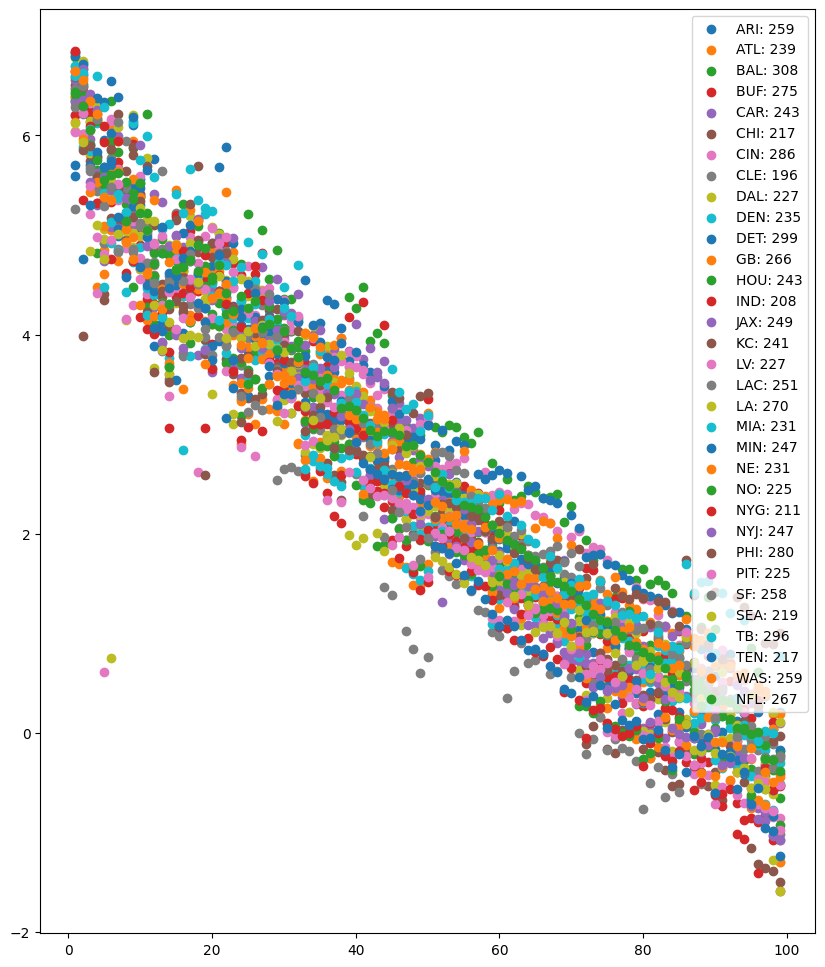

In [4]:
plt.figure(figsize=(10, 12))

for ep_set in ep_sets:
    name, set = ep_set
    plt.scatter(set['Yardline'], set['EP'], label = name+": "+str(int(np.sum(set['EP']))))

plt.scatter(ep_set_nfl['Yardline'], ep_set_nfl['EP'], label = "NFL: "+str(int(np.sum(ep_set_nfl['EP']))))
plt.legend()

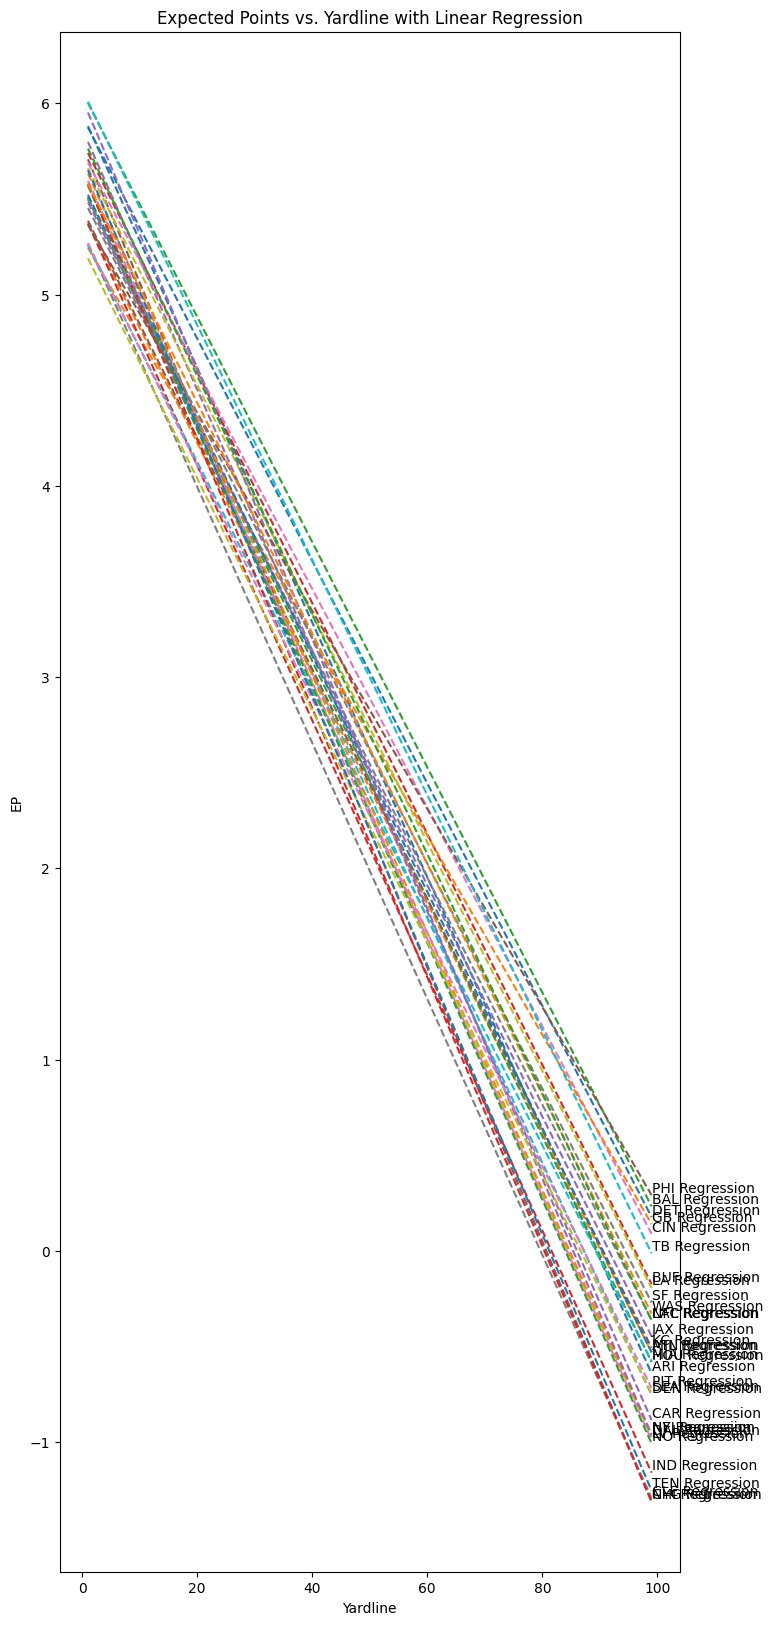

In [5]:

plt.figure(figsize=(8, 20))

# Plot scatter points and regression lines
for ep_set in ep_sets:
    name, set = ep_set
    
    # Compute linear regression line
    coeffs = np.polyfit(set['Yardline'], set['EP'], 1)
    x_vals = np.linspace(min(set['Yardline']), max(set['Yardline']), 100)
    y_vals = np.polyval(coeffs, x_vals)
    
    # Plot regression line
    plt.plot(x_vals, y_vals, linestyle="--", label=f"{name} Regression")

    # Label the line at its rightmost point
    plt.text(x_vals[-1], y_vals[-1], f"{name} Regression", verticalalignment='bottom', fontsize=10)

# Compute and plot NFL regression line
nfl_coeffs = np.polyfit(ep_set_nfl['Yardline'], ep_set_nfl['EP'], 1)
x_vals_nfl = np.linspace(min(ep_set_nfl['Yardline']), max(ep_set_nfl['Yardline']), 100)
y_vals_nfl = np.polyval(nfl_coeffs, x_vals_nfl)

# Plot NFL regression line
plt.plot(x_vals_nfl, y_vals_nfl, linestyle="--", label="NFL Regression")

# Label the NFL line at its rightmost point
plt.text(x_vals_nfl[-1], y_vals_nfl[-1], "NFL Regression", verticalalignment='bottom', fontsize=10)

plt.xlabel("Yardline")
plt.ylabel("EP")
plt.title("Expected Points vs. Yardline with Linear Regression")
plt.show()

In [6]:
# Create a list of (name, total_EP) tuples
ep_sums = [(name, np.sum(df['EP'])) for name, df in ep_sets]

# Sort by total_EP
ep_sums_sorted = sorted(ep_sums, key=lambda x: x[1], reverse=True)  # reverse=True for descending

# Print results
for name, total in ep_sums_sorted:
    print(f"{name}: {total:.2f}")


BAL: 308.61
DET: 299.55
TB: 296.80
CIN: 286.03
PHI: 280.02
BUF: 275.59
LA: 270.61
GB: 266.56
WAS: 259.98
ARI: 259.39
SF: 258.77
LAC: 251.98
JAX: 249.27
MIN: 247.02
NYJ: 247.00
HOU: 243.81
CAR: 243.25
KC: 241.57
ATL: 239.44
DEN: 235.56
MIA: 231.57
NE: 231.37
LV: 227.94
DAL: 227.67
NO: 225.89
PIT: 225.25
SEA: 219.89
TEN: 217.67
CHI: 217.62
NYG: 211.29
IND: 208.57
CLE: 196.68


In [7]:
freq_df = pd.read_csv("frequency.csv")

In [8]:
# Rename for consistency
freq_df.rename(columns={'down': 'Down', 'distance': 'Distance', 'yardline': 'Yardline'}, inplace=True)

# Apply the same filtering logic to match df in ep_sets:
# - down == 1
# - (distance == 10 and yardline >= 10) OR (distance == yardline and yardline < 10)
freq_df_filtered = freq_df[
    (freq_df['Down'] == 1) &
    (
        ((freq_df['Distance'] == 10) & (freq_df['Yardline'] >= 10)) |
        ((freq_df['Distance'] == freq_df['Yardline']) & (freq_df['Yardline'] < 10))
    )
]

tot = np.sum(freq_df_filtered['frequency'])

# Now compute weighted sums
ep_sums = []
for name, df in ep_sets:
    # Merge EP and frequency data on Down, Distance, Yardline
    merged = pd.merge(df, freq_df_filtered, on=['Down', 'Distance', 'Yardline'], how='inner')

    # Compute weighted EP
    merged['weighted_ep'] = merged['EP'] * merged['frequency']
    total_weighted_ep = merged['weighted_ep'].sum()

    ep_sums.append((name, total_weighted_ep/tot))

# Sort and print
ep_sums_sorted = sorted(ep_sums, key=lambda x: x[1], reverse=True)
rank = 1
for name, total in ep_sums_sorted:
    print(f"{rank:2d}: {name:<3}: {total:.2f}")
    rank+=1

 1: BAL: 2.97
 2: DET: 2.92
 3: CIN: 2.81
 4: TB : 2.78
 5: BUF: 2.58
 6: LA : 2.55
 7: GB : 2.55
 8: PHI: 2.54
 9: SF : 2.48
10: WAS: 2.45
11: ARI: 2.39
12: LAC: 2.38
13: MIN: 2.36
14: JAX: 2.31
15: HOU: 2.31
16: NYJ: 2.29
17: CAR: 2.26
18: KC : 2.23
19: MIA: 2.20
20: ATL: 2.19
21: DEN: 2.16
22: NE : 2.14
23: SEA: 2.12
24: LV : 2.10
25: DAL: 2.08
26: PIT: 2.06
27: NO : 1.98
28: CHI: 1.98
29: IND: 1.95
30: TEN: 1.94
31: NYG: 1.89
32: CLE: 1.64


### DEFENSE

In [9]:
def_ep_sets = []
down = 1
distance = 10

unfinished = []

for team in nfl_teams:
    try:
        def_ep_set_df = pd.read_csv('team_data/team-data/'+team+'/norm_def_eps.csv')
        def_ep_set = def_ep_set_df[def_ep_set_df['Down'] == down]
        def_ep_set = def_ep_set[((def_ep_set['Distance'] == distance) & (def_ep_set['Yardline'] >= distance)) | ((def_ep_set['Yardline'] < distance) 
                                                                                                    & (def_ep_set['Distance'] == def_ep_set['Yardline']))]
        def_ep_sets.append((team, def_ep_set))
    except:
        unfinished.append(team)
        pass

print(unfinished)

[]


In [10]:
# Sort ep_sets by the sum of EP in ascending order
sorted_ep_sets = sorted(def_ep_sets, key=lambda ep_set: np.sum(ep_set[1]['EP']), reverse=True)

snamelist=[]

# Print names in order
for name, _ in sorted_ep_sets:
    snamelist.append(name)

print(snamelist)

['JAX', 'CAR', 'ATL', 'NE', 'ARI', 'SEA', 'NYG', 'MIA', 'CLE', 'LV', 'NO', 'LA', 'KC', 'CIN', 'DAL', 'TEN', 'TB', 'NYJ', 'DET', 'BAL', 'PHI', 'PIT', 'HOU', 'CHI', 'GB', 'WAS', 'IND', 'SF', 'LAC', 'BUF', 'DEN', 'MIN']


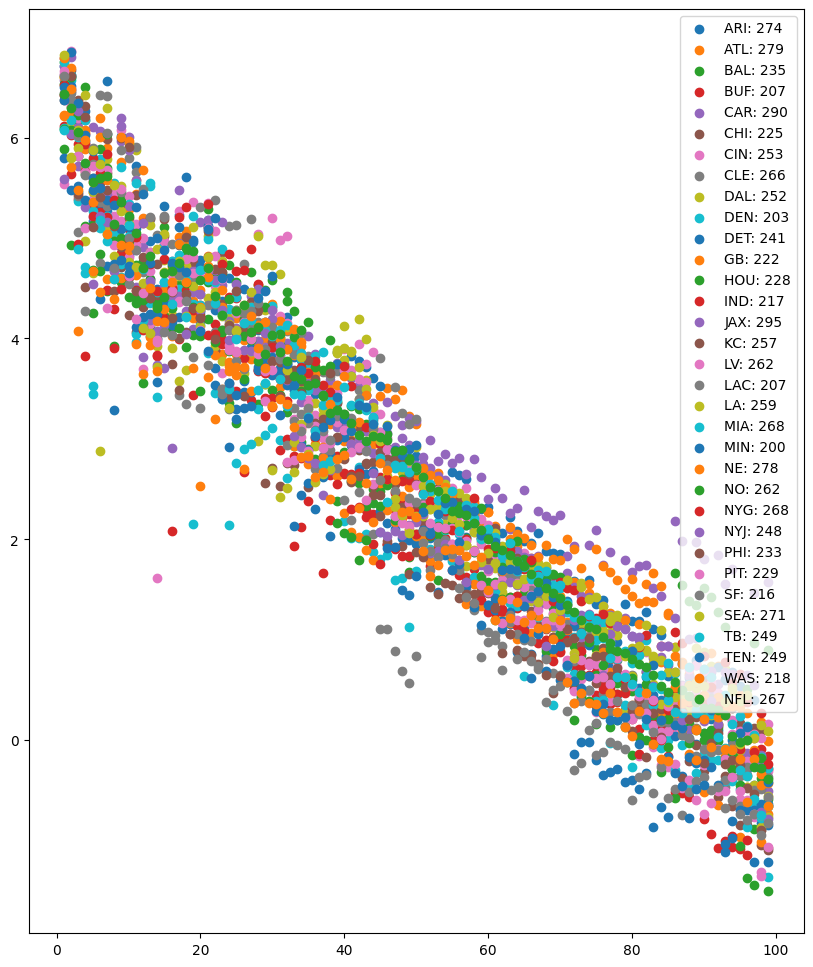

In [19]:
plt.figure(figsize=(10, 12))

for ep_set in def_ep_sets:
    name, set = ep_set
    plt.scatter(set['Yardline'], set['EP'], label = name+": "+str(int(np.sum(set['EP']))))

plt.scatter(ep_set_nfl['Yardline'], ep_set_nfl['EP'], label = "NFL: "+str(int(np.sum(ep_set_nfl['EP']))))
plt.legend()

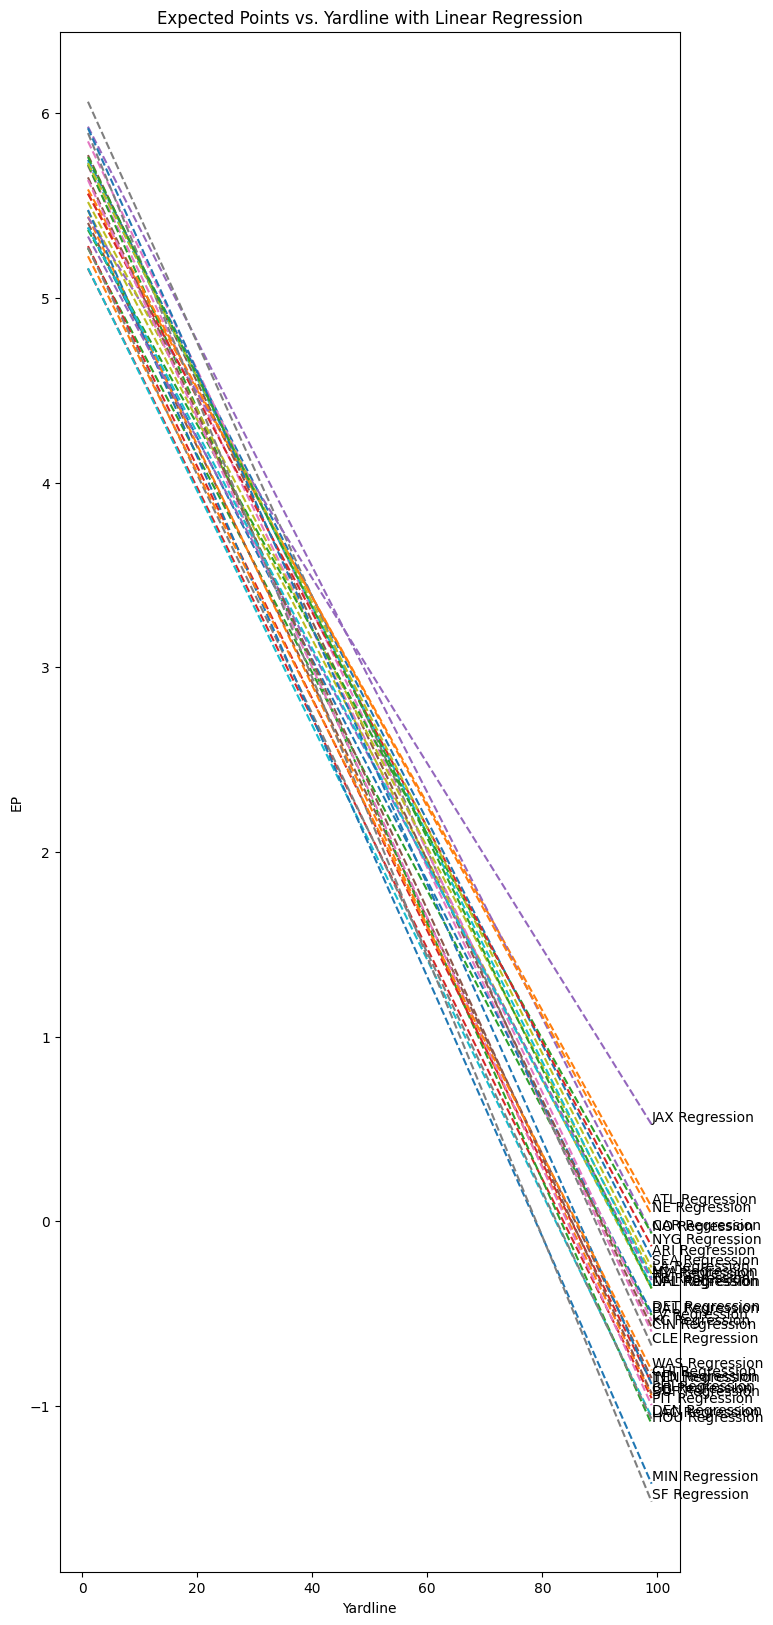

In [12]:

plt.figure(figsize=(8, 20))

# Plot scatter points and regression lines
for ep_set in def_ep_sets:
    name, set = ep_set
    
    # Compute linear regression line
    coeffs = np.polyfit(set['Yardline'], set['EP'], 1)
    x_vals = np.linspace(min(set['Yardline']), max(set['Yardline']), 100)
    y_vals = np.polyval(coeffs, x_vals)
    
    # Plot regression line
    plt.plot(x_vals, y_vals, linestyle="--", label=f"{name} Regression")

    # Label the line at its rightmost point
    plt.text(x_vals[-1], y_vals[-1], f"{name} Regression", verticalalignment='bottom', fontsize=10)

# Compute and plot NFL regression line
nfl_coeffs = np.polyfit(ep_set_nfl['Yardline'], ep_set_nfl['EP'], 1)
x_vals_nfl = np.linspace(min(ep_set_nfl['Yardline']), max(ep_set_nfl['Yardline']), 100)
y_vals_nfl = np.polyval(nfl_coeffs, x_vals_nfl)

# Plot NFL regression line
plt.plot(x_vals_nfl, y_vals_nfl, linestyle="--", label="NFL Regression")

# Label the NFL line at its rightmost point
plt.text(x_vals_nfl[-1], y_vals_nfl[-1], "NFL Regression", verticalalignment='bottom', fontsize=10)

plt.xlabel("Yardline")
plt.ylabel("EP")
plt.title("Expected Points vs. Yardline with Linear Regression")
plt.show()

In [13]:
# Create a list of (name, total_EP) tuples
def_ep_sums = [(name, np.sum(df['EP'])) for name, df in def_ep_sets]

# Sort by total_EP
def_ep_sums_sorted = sorted(def_ep_sums, key=lambda x: x[1], reverse=False)  # reverse=False for ascending

# Print results
for name, total in def_ep_sums_sorted:
    print(f"{name}: {total:.2f}")

MIN: 200.74
DEN: 203.02
BUF: 207.95
LAC: 207.98
SF: 216.52
IND: 217.96
WAS: 218.73
GB: 222.75
CHI: 225.57
HOU: 228.87
PIT: 229.81
PHI: 233.69
BAL: 235.67
DET: 241.83
NYJ: 248.21
TB: 249.15
TEN: 249.37
DAL: 252.88
CIN: 253.30
KC: 257.46
LA: 259.17
NO: 262.46
LV: 262.76
CLE: 266.79
MIA: 268.65
NYG: 268.74
SEA: 271.25
ARI: 274.80
NE: 278.41
ATL: 279.30
CAR: 290.41
JAX: 295.09


In [20]:
freq_df = pd.read_csv("frequency.csv")

# Rename for consistency
freq_df.rename(columns={'down': 'Down', 'distance': 'Distance', 'yardline': 'Yardline'}, inplace=True)

# Apply the same filtering logic to match df in ep_sets:
# - down == 1
# - (distance == 10 and yardline >= 10) OR (distance == yardline and yardline < 10)
freq_df_filtered = freq_df[
    (freq_df['Down'] == 1) &
    (
        ((freq_df['Distance'] == 10) & (freq_df['Yardline'] >= 10)) |
        ((freq_df['Distance'] == freq_df['Yardline']) & (freq_df['Yardline'] < 10))
    )
]

tot = np.sum(freq_df_filtered['frequency'])

# Now compute weighted sums
def_ep_sums = []
for name, df in def_ep_sets:
    # Merge EP and frequency data on Down, Distance, Yardline
    merged = pd.merge(df, freq_df_filtered, on=['Down', 'Distance', 'Yardline'], how='inner')

    # Compute weighted EP
    merged['weighted_ep'] = merged['EP'] * merged['frequency']
    total_weighted_ep = merged['weighted_ep'].sum()

    def_ep_sums.append((name, total_weighted_ep/tot))

# Sort and print
def_ep_sums_sorted = sorted(def_ep_sums, key=lambda x: x[1], reverse=False)
rank = 1
for name, total in def_ep_sums_sorted:
    print(f"{rank:2d}: {name:<3}: {total:.2f}")
    rank+=1

 1: MIN: 1.76
 2: LAC: 1.83
 3: DEN: 1.86
 4: SF : 1.90
 5: BUF: 1.95
 6: IND: 1.98
 7: WAS: 1.98
 8: GB : 2.07
 9: HOU: 2.09
10: CHI: 2.09
11: PHI: 2.16
12: PIT: 2.16
13: DET: 2.20
14: BAL: 2.25
15: NYJ: 2.31
16: TEN: 2.32
17: CIN: 2.34
18: KC : 2.36
19: NO : 2.39
20: DAL: 2.39
21: TB : 2.42
22: LV : 2.42
23: LA : 2.46
24: CLE: 2.49
25: MIA: 2.52
26: NYG: 2.53
27: SEA: 2.57
28: ATL: 2.65
29: ARI: 2.69
30: NE : 2.74
31: CAR: 2.80
32: JAX: 2.83


### Cumulative Ranking

In [21]:
# Convert both lists to dictionaries
off_dict = dict(ep_sums_sorted)
def_dict = dict(def_ep_sums_sorted)

# Compute the difference per team (offense - defense)
diff_sums = []
for team in off_dict:
    diff = off_dict[team] - def_dict.get(team, 0)
    diff_sums.append((team, diff))

# Sort and print the differences in descending order
diff_sums_sorted = sorted(diff_sums, key=lambda x: x[1], reverse=True)

for rank, (team, diff) in enumerate(diff_sums_sorted, start=1):
    print(f"{rank:2d}: {team:<3}: {diff:.2f}")

 1: DET: 0.73
 2: BAL: 0.72
 3: BUF: 0.63
 4: MIN: 0.60
 5: SF : 0.58
 6: LAC: 0.55
 7: GB : 0.47
 8: WAS: 0.47
 9: CIN: 0.47
10: PHI: 0.38
11: TB : 0.36
12: DEN: 0.30
13: HOU: 0.22
14: LA : 0.09
15: NYJ: -0.03
16: IND: -0.03
17: PIT: -0.09
18: CHI: -0.12
19: KC : -0.12
20: ARI: -0.29
21: DAL: -0.32
22: MIA: -0.32
23: LV : -0.33
24: TEN: -0.37
25: NO : -0.41
26: SEA: -0.45
27: ATL: -0.46
28: JAX: -0.52
29: CAR: -0.54
30: NE : -0.60
31: NYG: -0.64
32: CLE: -0.85
